In [5]:
#!pip install pyswarms
import warnings as warn
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
warn.filterwarnings('ignore')
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=100)


2020-07-11 13:47:32,183 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.56e-8
2020-07-11 13:47:32,315 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.5563892152809994e-08, best pos: [-4.28132334e-05 -2.09119390e-04]


2020-07-11 13:47:35,957 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.02e-8
2020-07-11 13:47:36,094 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0164819337512584e-08, best pos: [-4.11625459e-05  9.20351246e-05]


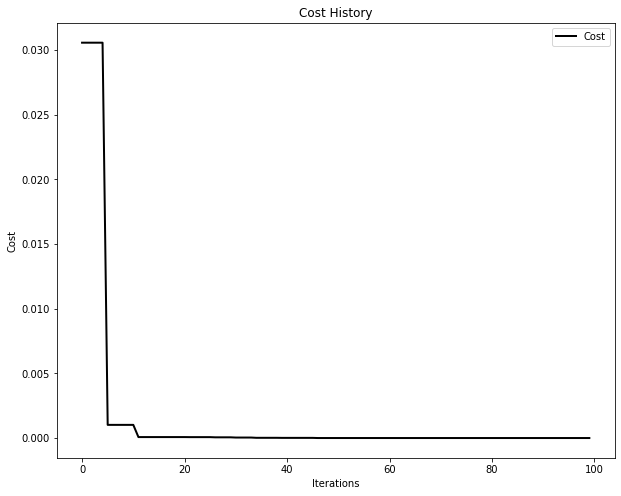

In [6]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
%matplotlib inline
# Set-up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()


2020-07-11 13:47:41,506 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
2020-07-11 13:47:41,507 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


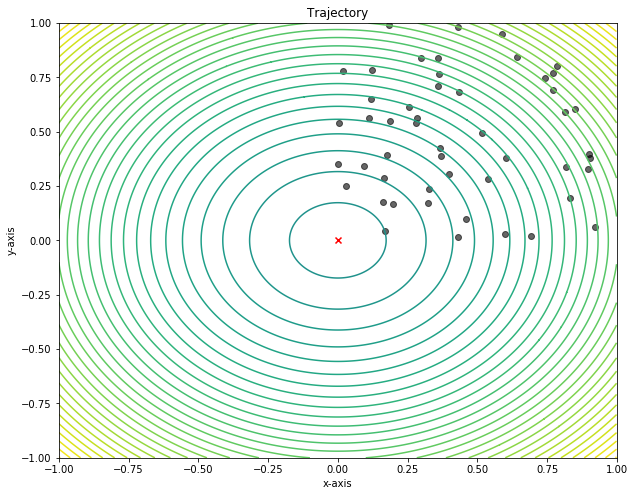

In [7]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from pyswarms.utils.plotters.formatters import Mesher, Designer
# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])
anim = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))

anim.save('pso.gif', writer='imagemagick')


<img src='pso.gif'/>

2020-07-11 13:47:53,690 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
2020-07-11 13:47:53,691 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


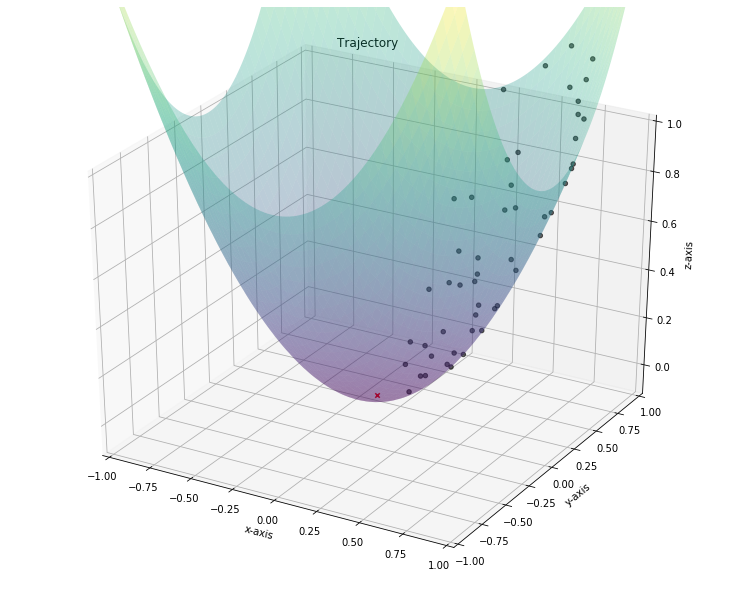

In [8]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from pyswarms.utils.plotters.formatters import Mesher, Designer
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
anim3d = animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))    
anim3d.save('animPSO3d.gif', writer='imagemagick')

<img src='animPSO3d.gif'/>

In [ ]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx

# Set-up choices for the parameters
options = {
    'c1': (1,5),
    'c2': (6,10),
    'w': (2,5),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=40,
            dimensions=20, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

print('best_score', best_score)
print('c1',best_options['c1']) 
print('c2',best_options['c2']) 
